<a href="https://colab.research.google.com/github/lschuler-dotcom/capstone_project/blob/main/notebooks/capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🧠 Students' Social Media Addiction 🧠**

## **Ingest Data from Bigquery**

### **Import Packages & Ingest Datasets**

In [205]:
#Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.cloud import bigquery
from google.colab import auth

**Note:**
I asked google gemini how you ingest csv into python from bigquery
and what inputs do you need from me to create the ingestion to make it so I don't need to manually upload files everytime I reconnect.

In [206]:
pip install pandas google-cloud-bigquery db-dtypes

In [207]:
# Authenticate for biquery
auth.authenticate_user()
print("Authentication successful.")

Authentication successful.


### **Ingest and Create dataframes**

**Social media**

In [208]:
# --- Configuration Variables ---
PROJECT_ID = 'compscix490-003-capstone'
# We will target the 'students_social_media_addiction' table within the 'raw_data' dataset
DATASET_ID = 'raw_data'
TABLE_NAME = 'students_social_media_addiction'

# Construct the full SQL query to select all data
sql_query = f"""
SELECT * FROM `{PROJECT_ID}.{DATASET_ID}.{TABLE_NAME}`
"""

# Load data into a Pandas DataFrame using the pandas-gbq connector
# The project_id argument tells the library which GCP project to bill the query to
df_ssma = pd.read_gbq(
    query=sql_query,
    project_id=PROJECT_ID,
    dialect='standard'
)
print(f"Successfully loaded {len(df)} rows into a Pandas DataFrame.")

/tmp/ipython-input-4018627628.py:14: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  df_ssma = pd.read_gbq(


Successfully loaded 705 rows into a Pandas DataFrame.


**GDP**

In [209]:
# wbg_gdp
PROJECT_ID = 'compscix490-003-capstone'
DATASET_ID = 'raw_data'
TABLE_NAME = 'wbg_gdp'

sql_query = f"""
SELECT * FROM `{PROJECT_ID}.{DATASET_ID}.{TABLE_NAME}`
"""

# Read into DataFrame 'df_gdp'
df_gdp_wide = pd.read_gbq(query=sql_query, project_id=PROJECT_ID, dialect='standard')

print(f"Loaded {len(df_gdp)} rows from {TABLE_NAME}.")

/tmp/ipython-input-3797320365.py:11: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  df_gdp_wide = pd.read_gbq(query=sql_query, project_id=PROJECT_ID, dialect='standard')


Loaded 266 rows from wbg_gdp.


**Pct Int users**

In [210]:
# wbg_pct_int_users
PROJECT_ID = 'compscix490-003-capstone'
DATASET_ID = 'raw_data'
TABLE_NAME = 'wbg_perc_int_users'

sql_query = f"""
SELECT * FROM `{PROJECT_ID}.{DATASET_ID}.{TABLE_NAME}`
"""

# Read into DataFrame 'df_int_users'
df_perc_iu_wide = pd.read_gbq(query=sql_query, project_id=PROJECT_ID, dialect='standard')

print(f"Loaded {len(df_int_users)} rows from {TABLE_NAME}.")
print(df_int_users.head())

/tmp/ipython-input-4051044942.py:11: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  df_perc_iu_wide = pd.read_gbq(query=sql_query, project_id=PROJECT_ID, dialect='standard')


Loaded 266 rows from wbg_perc_int_users.
                  Country Name Country Code  \
0  Africa Eastern and Southern          AFE   
1                  Afghanistan          AFG   
2   Africa Western and Central          AFW   
3                   Arab World          ARB   
4               American Samoa          ASM   

                                     Indicator Name  Indicator Code 1960 1961  \
0  Individuals using the Internet (% of population)  IT.NET.USER.ZS             
1  Individuals using the Internet (% of population)  IT.NET.USER.ZS             
2  Individuals using the Internet (% of population)  IT.NET.USER.ZS             
3  Individuals using the Internet (% of population)  IT.NET.USER.ZS             
4  Individuals using the Internet (% of population)  IT.NET.USER.ZS             

  1962 1963 1964 1965  ...   2015  2016  2017  2018  2019     2020     2021  \
0                      ...  14.30  15.8  17.3  19.6  22.4  25.0000  28.2000   
1                      ...   8.

**Population**

In [211]:
# wbg_population
PROJECT_ID = 'compscix490-003-capstone'
DATASET_ID = 'raw_data'
TABLE_NAME = 'wbg_population'

sql_query = f"""
SELECT * FROM `{PROJECT_ID}.{DATASET_ID}.{TABLE_NAME}`
"""

# Read into DataFrame 'df_population'
df_pop_wide = pd.read_gbq(query=sql_query, project_id=PROJECT_ID, dialect='standard')

print(f"Loaded {len(df_population)} rows from {TABLE_NAME}.")

/tmp/ipython-input-3255796590.py:11: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  df_pop_wide = pd.read_gbq(query=sql_query, project_id=PROJECT_ID, dialect='standard')


Loaded 266 rows from wbg_population.


### **Inspect dataframes**

In [212]:
# Quick view of addiction data
df_ssma.head(1)

,student_id,age,gender,academic_level,country,avg_daily_usage_hours,most_used_platform,affects_academic_performance,sleep_hours_per_night,mental_health_score,relationship_status,conflicts_over_social_media,addicted_score
0,231,20,Female,Undergraduate,Australia,4.7,Facebook,False,7.4,7,In Relationship,2,5


In [213]:
# Quick view of population data
df_pop_wide.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Not classified,INX,"Population, total",SP.POP.TOTL,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [214]:
# Quick view of GDP data
df_gdp_wide.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,27458.225331,27441.529662,28440.051964,30082.127645,31096.205074,22855.93232,27200.061079,30559.533535,33984.79062,NaN


In [215]:
# Quick view of % internet usage data
df_perc_iu_wide.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Africa Eastern and Southern,AFE,Individuals using the Internet (% of population),IT.NET.USER.ZS,,,,,,,...,14.3,15.8,17.3,19.6,22.4,25.0,28.2,30.2,32.4,35.0


### **Analysis grain**
* I am doing my analysis at the student level so only want the country data to enrich my addiction dataset - thus only require the most recent population, GDP per capita and internet usage percentage data
* I am including 2024 and 2023 to do Growth %

In [216]:
# Remove earlier years data from wbg dataframes
df_piu = df_perc_iu_wide[["Country Name", 'Country Code','2024','2023']].copy()
df_pop = df_pop_wide[["Country Name", 'Country Code','2024','2023']].copy()
df_gdp = df_gdp_wide[["Country Name", 'Country Code','2024','2023']].copy()

In [217]:
print("The remaining columns of the world bank data frames are:\n")
print("% Internet usage\n",df_piu.columns)
print("\nGDP\n",df_gdp.columns)
print("\nPopulation\n",df_pop.columns)

The remaining columns of the world bank data frames are:

% Internet usage
 Index(['Country Name', 'Country Code', '2024', '2023'], dtype='object')

GDP
 Index(['Country Name', 'Country Code', '2024', '2023'], dtype='object')

Population
 Index(['Country Name', 'Country Code', '2024', '2023'], dtype='object')


### **World bank data types, nulls and shape**




In [218]:
print("\nData types for percent internet users\n")
df_piu.info()
print("\nThe shape is:",df_piu.shape)

print("\nData types for total population\n")
df_pop.info()
print("\nThe shape is:",df_pop.shape)

print("\nData types for GDP per capita")
df_gdp.info()
print("\nThe shape is:",df_gdp.shape)


Data types for percent internet users

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  266 non-null    object 
 1   Country Code  266 non-null    object 
 2   2024          82 non-null     float64
 3   2023          214 non-null    float64
dtypes: float64(2), object(2)
memory usage: 8.4+ KB

The shape is: (266, 4)

Data types for total population

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Name  266 non-null    object
 1   Country Code  266 non-null    object
 2   2024          265 non-null    Int64 
 3   2023          265 non-null    Int64 
dtypes: Int64(2), object(2)
memory usage: 9.0+ KB

The shape is: (266, 4)

Data types for GDP per capita
<class 'pandas.core.frame.D

**Interpretation**
* There are a lot of null values in the PIU dataframe

In [219]:
# Calculate percentage of missing 2024 Internet users (%) countries
piu_2024_null_count = df_piu['2024'].isna().sum()
total_rows_piu = len(df_piu)
piu_2024_missing_perc = (piu_2024_null_count / total_rows_piu) * 100
print(f"The missing % of countries in the 2024 Internet user % of population dataset is {piu_2024_missing_perc:.2f}% (2dp)")

The missing % of countries in the 2024 Internet user % of population dataset is 69.17% (2dp)


### **World bank Numeric Summary Stats**

In [220]:
print("The numerical summary of GDP per Capita in US$ is:\n",df_gdp.describe())
print("\nThe numerical summary of Internet users % of population is:\n",df_piu.describe())
print("\nThe numerical summary of Total Population is:\n",df_pop.describe())

print("\nThe population data is in scientific notation due to the large numbers with population max reaching billions")


The numerical summary of GDP per Capita in US$ is:
                 2024           2023
count     231.000000     248.000000
mean    18153.228316   19933.162466
std     24360.666965   30893.893903
min       153.930218     192.074305
25%      2592.860993    2531.811779
50%      7695.242064    7856.947812
75%     23918.983071   23114.748587
max    138934.958846  256580.515123

The numerical summary of Internet users % of population is:
              2024        2023
count   82.000000  214.000000
mean    77.377753   70.300504
std     21.901769   24.383750
min      8.949830   11.078400
25%     68.895200   54.250000
50%     87.303950   79.416650
75%     92.590200   89.222600
max    100.000000  100.000000

The numerical summary of Total Population is:
                     2024               2023
count              265.0              265.0
mean    331881149.622642   328429234.958491
std    1021729567.658422  1012514886.972564
min               9646.0             9816.0
25%            1792179.0

### **World Bank Missing Values and Duplicates**

In [221]:
# Check for null values in the df's
print("The null summary of GDP per Capita in US$ is:\n",df_gdp.isna().sum())
print("\nThe null summary of Internet users % of population is:\n",df_piu.isna().sum())
print("\nThe null summary of Total Population is:\n",df_pop.isna().sum())

The null summary of GDP per Capita in US$ is:
 Country Name     0
Country Code     0
2024            35
2023            18
dtype: int64

The null summary of Internet users % of population is:
 Country Name      0
Country Code      0
2024            184
2023             52
dtype: int64

The null summary of Total Population is:
 Country Name    0
Country Code    0
2024            1
2023            1
dtype: int64


In [222]:
# Check duplicates
print(f"There are {df_gdp.duplicated().sum()} duplicates in the gdp df")
print(f"There are {df_pop.duplicated().sum()} duplicates in this pop df")
print(f"There are {df_piu.duplicated().sum()} duplicates in this piu df")

There are 0 duplicates in the gdp df
There are 0 duplicates in this pop df
There are 0 duplicates in this piu df


**Interpretation**
* The world internet usage percentage is missing a lot of entries for 2024 - data is incomplete
* Although it would be good enrichment, there is no feasible way to fill the dataset with a central tendancy as that would falsify the information - thus I will not be using the Internet Usage (%) dataset for this student level enrichment.


### **Students Social Media and Addiction data types, nulls, shape**

In [223]:
# Data types, nulls and shape
print("Data types for percent internet users\n")
df_ssma.info()
print("\nThe shape is:",df_ssma.shape)

Data types for percent internet users

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   student_id                    705 non-null    Int64  
 1   age                           705 non-null    Int64  
 2   gender                        705 non-null    object 
 3   academic_level                705 non-null    object 
 4   country                       705 non-null    object 
 5   avg_daily_usage_hours         705 non-null    float64
 6   most_used_platform            705 non-null    object 
 7   affects_academic_performance  705 non-null    boolean
 8   sleep_hours_per_night         705 non-null    float64
 9   mental_health_score           705 non-null    Int64  
 10  relationship_status           705 non-null    object 
 11  conflicts_over_social_media   705 non-null    Int64  
 12  addicted_score           

### **Students Social Media and Addiction Numeric Summary Stats**

In [224]:
# Summary stats
df_ssma.describe()

,student_id,age,avg_daily_usage_hours,sleep_hours_per_night,mental_health_score,conflicts_over_social_media,addicted_score
count,705.0,705.0,705.000000,705.000000,705.0,705.0,705.0
mean,353.0,20.659574,4.918723,6.868936,6.22695,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.0,18.0,1.500000,3.800000,4.0,0.0,2.0
25%,177.0,19.0,4.100000,6.000000,5.0,2.0,5.0
50%,353.0,21.0,4.800000,6.900000,6.0,3.0,7.0
75%,529.0,22.0,5.800000,7.700000,7.0,4.0,8.0
max,705.0,24.0,8.500000,9.600000,9.0,5.0,9.0


### **Students Social Media and Addiction Missing Values and Duplicates**

In [225]:
print("\nThe null summary of Student Social Media Addiction is:\n",df_ssma.isna().sum())
print(f"\nThere are {df_ssma.duplicated().sum()} duplicates in this ssma df")


The null summary of Student Social Media Addiction is:
 student_id                      0
age                             0
gender                          0
academic_level                  0
country                         0
avg_daily_usage_hours           0
most_used_platform              0
affects_academic_performance    0
sleep_hours_per_night           0
mental_health_score             0
relationship_status             0
conflicts_over_social_media     0
addicted_score                  0
dtype: int64

There are 0 duplicates in this ssma df


**Interpretation:**
* No missing data or null values
* Data types are as expected
* As expected - data source stated data was clean, validated and de-duplicated

## **Standardise dataframes**

### **Standardise columns**

In [226]:
# SSM Addiction df
df_ssma.columns = df_ssma.columns.str.strip().str.lower()
df_ssma.rename(columns={'country': 'country_name'}, inplace=True)

In [227]:
# Population df
df_pop.columns = df_pop.columns.str.strip().str.lower()
df_pop.rename(columns={"country name": "country_name",
                       "country code": "country_code",
                       "indicator name": "indicator_name",
                       "indicator code": "indicator_code",
                       "2023":"pop_2023",
                       "2024":"pop_2024"
                       },inplace=True
)

In [228]:
# GDP df
df_gdp.columns = df_gdp.columns.str.strip().str.lower()
df_gdp.rename(columns={"country name": "country_name",
                       "country code": "country_code",
                       "indicator name": "indicator_name",
                       "indicator code": "indicator_code",
                       "2023": "gdp_2023",
                       "2024": "gdp_2024"
                       },inplace=True
)

In [229]:
# PIU df
df_piu.columns = df_piu.columns.str.strip().str.lower()
df_piu.rename(columns={"country name": "country_name",
                       "country code": "country_code",
                       "indicator name": "indicator_name",
                       "indicator code": "indicator_code",
                       "2023": "piu_2023",
                       "2024": "piu_2024"
                       },inplace=True
)

In [230]:
# Check columns
print("The ssma dataframe columns are\n",df_ssma.columns,"\n")
print("The population dataframe columns are\n",df_pop.columns,"\n")
print("The gdp dataframe columns are\n",df_gdp.columns)
print("The piu dataframe columns are\n",df_piu.columns)

The ssma dataframe columns are
 Index(['student_id', 'age', 'gender', 'academic_level', 'country_name',
       'avg_daily_usage_hours', 'most_used_platform',
       'affects_academic_performance', 'sleep_hours_per_night',
       'mental_health_score', 'relationship_status',
       'conflicts_over_social_media', 'addicted_score'],
      dtype='object') 

The population dataframe columns are
 Index(['country_name', 'country_code', 'pop_2024', 'pop_2023'], dtype='object') 

The gdp dataframe columns are
 Index(['country_name', 'country_code', 'gdp_2024', 'gdp_2023'], dtype='object')
The piu dataframe columns are
 Index(['country_name', 'country_code', 'piu_2024', 'piu_2023'], dtype='object')


## **Join tables and remap names**

**Join tables**
* Inspection below reveals the world bank data has exact same country names and codes so I will just keep one country code, the gdp and population data for 2023 and 2024, joining on country name
* As I am joining on country name, I need to ensure the country names are the same so the joins are complete. I will do a left join to see if there are discrepancies and then will make amendments as necessary so no students are ommitted.

In [231]:
# Check world data country names are the same
print(f"The count of rows before join is:\n {df_pop.isna().sum()}\n")

country_name_check = df_pop.merge(
    df_gdp['country_name'], on='country_name', how='inner'
)
print(f"The count of rows after join is:\n {country_name_check.isna().sum()}")

The count of rows before join is:
 country_name    0
country_code    0
pop_2024        1
pop_2023        1
dtype: int64

The count of rows after join is:
 country_name    0
country_code    0
pop_2024        1
pop_2023        1
dtype: int64


In [232]:
df_merged = (
    df_ssma
    .merge(df_pop, on="country_name", how='left')
    .merge(df_gdp, on="country_name", how='left')
)
df_merged[['country_name','pop_2024','pop_2023','gdp_2024','gdp_2023']].head()

,country_name,pop_2024,pop_2023,gdp_2024,gdp_2023
0,Australia,27204809,26652777,64407.484257,64835.919975
1,Australia,27204809,26652777,64407.484257,64835.919975
2,Australia,27204809,26652777,64407.484257,64835.919975
3,Australia,27204809,26652777,64407.484257,64835.919975
4,Australia,27204809,26652777,64407.484257,64835.919975


**Interpretation:**
* Countries like USA and UK in the survey data are called United States and United Kingdom in the World Bank Dataset so the values are showing as NaN
* Will need to remap names for the left join to pull the appropriate data from pop and gdp datasets

**Remap names**

In [233]:
# SSMA unique country names
df_ssma['country_name'].unique()

array(['Australia', 'Bangladesh', 'Canada', 'Cyprus', 'Denmark',
       'Finland', 'France', 'Germany', 'Greece', 'India', 'Israel',
       'Italy', 'Kenya', 'Kyrgyzstan', 'Lithuania', 'Mexico',
       'Montenegro', 'Nepal', 'New Zealand', 'Panama', 'Poland', 'Spain',
       'Sri Lanka', 'Switzerland', 'UK', 'Venezuela', 'Vietnam', 'Yemen',
       'Armenia', 'Austria', 'Brazil', 'Colombia', 'Costa Rica',
       'Croatia', 'Ecuador', 'Estonia', 'Hong Kong', 'Iceland', 'Ireland',
       'Kosovo', 'Liechtenstein', 'Maldives', 'Moldova', 'Monaco',
       'Netherlands', 'Nigeria', 'Norway', 'Oman', 'Pakistan', 'Romania',
       'Russia', 'South Korea', 'Syria', 'Thailand', 'Turkey', 'UAE',
       'USA', 'Japan', 'Afghanistan', 'Bahamas', 'Bahrain', 'Belarus',
       'Bolivia', 'Bosnia', 'Bulgaria', 'Chile', 'Georgia', 'Iraq',
       'Malaysia', 'Malta', 'San Marino', 'Slovakia', 'South Africa',
       'Sweden', 'Taiwan', 'Bhutan', 'Czech Republic', 'Ghana', 'Jamaica',
       'Kazakhstan', '

In [234]:
# GDP and Pop unique country names
df_pop['country_name'].unique()

array(['Not classified', 'West Bank and Gaza',
       'Sint Maarten (Dutch part)', 'St. Martin (French part)',
       'Turks and Caicos Islands', 'Tuvalu', 'Nauru',
       'British Virgin Islands', 'Cayman Islands',
       'Northern Mariana Islands', 'Palau', 'Andorra', 'San Marino',
       'Marshall Islands', 'Liechtenstein', 'Monaco', 'American Samoa',
       'Gibraltar', 'Faroe Islands', 'Greenland', 'Virgin Islands (U.S.)',
       'Bermuda', 'Seychelles', 'St. Kitts and Nevis', 'Isle of Man',
       'Micronesia, Fed. Sts.', 'Kiribati', 'Aruba',
       'Antigua and Barbuda', 'Dominica', 'Qatar',
       'Sao Tome and Principe', 'Vanuatu', 'Tonga', 'Guam',
       'St. Vincent and the Grenadines', 'New Caledonia', 'Grenada',
       'St. Lucia', 'French Polynesia', 'Belize', 'Maldives', 'Djibouti',
       'Brunei Darussalam', 'Channel Islands', 'Samoa', 'Curacao',
       'Bahamas, The', 'Solomon Islands', 'United Arab Emirates',
       'Iceland', 'Bahrain', 'Comoros', 'Barbados', 'Cabo 

### **Map survey names to world bank names**

In [235]:
# Clean names
df_ssma["country_name"] = df_ssma["country_name"].astype(str).str.strip()
df_pop["country_name"]  = df_pop["country_name"].astype(str).str.strip()
df_gdp["country_name"]  = df_gdp["country_name"].astype(str).str.strip()

In [236]:
# Based on the above names - map survey names to world bank names - less names to map
df_ssma["country_name_std"] = df_ssma["country_name"].map({
    "USA": "United States",
    "UK": "United Kingdom",
    "UAE": "United Arab Emirates",
    "South Korea": "Korea, Rep.",
    "Russia": "Russian Federation",
    "Czech Republic": "Czechia",
    "Turkey": "Turkiye",
    "Vietnam": "Viet Nam",
    "Trinidad": "Trinidad and Tobago",
    "Bahamas": "Bahamas, The",
    "Venezuela": "Venezuela, RB",
    "Syria": "Syrian Arab Republic",
    "Hong Kong": "Hong Kong SAR, China",
    "Egypt": "Egypt, Arab Rep.",
    "Slovakia": "Slovak Republic",
    "Kyrgyzstan": "Kyrgyz Republic",
    "Bosnia":"Bosnia and Herzegovina",
    "Yemen":"Yemen, Rep."
}).fillna(df_ssma["country_name"])

In [237]:
# Join tables on standardised names
df_merged_mapped = (
    df_ssma
    .merge(df_pop, left_on="country_name_std", right_on="country_name", how='left')
    .merge(df_gdp, left_on="country_name_std", right_on="country_name", how='left')
)

In [238]:
# Check column names
df_merged_mapped.columns

Index(['student_id', 'age', 'gender', 'academic_level', 'country_name_x',
       'avg_daily_usage_hours', 'most_used_platform',
       'affects_academic_performance', 'sleep_hours_per_night',
       'mental_health_score', 'relationship_status',
       'conflicts_over_social_media', 'addicted_score', 'country_name_std',
       'country_name_y', 'country_code_x', 'pop_2024', 'pop_2023',
       'country_name', 'country_code_y', 'gdp_2024', 'gdp_2023'],
      dtype='object')

In [239]:
# Only take necessary columns
df_consol = df_merged_mapped[['student_id', 'age', 'gender', 'academic_level',
                       'avg_daily_usage_hours', 'most_used_platform',
                       'affects_academic_performance', 'sleep_hours_per_night',
                       'mental_health_score', 'relationship_status',
                       'conflicts_over_social_media', 'addicted_score',
                       'country_name_x','country_name_std', 'country_code_x',
                       'gdp_2024','pop_2024','gdp_2023','pop_2023']]

df_consol_v1 = df_consol.rename(
    columns={"country_code_x": "country_code",
             "country_name_x": "country_name",
})

df_consol_v1.head()

,student_id,age,gender,academic_level,avg_daily_usage_hours,most_used_platform,affects_academic_performance,sleep_hours_per_night,mental_health_score,relationship_status,conflicts_over_social_media,addicted_score,country_name,country_name_std,country_code,gdp_2024,pop_2024,gdp_2023,pop_2023
0,231,20,Female,Undergraduate,4.7,Facebook,False,7.4,7,In Relationship,2,5,Australia,Australia,AUS,64407.484257,27204809,64835.919975,26652777
1,247,20,Female,Undergraduate,4.8,Facebook,False,7.2,7,In Relationship,2,5,Australia,Australia,AUS,64407.484257,27204809,64835.919975,26652777
2,263,20,Female,Undergraduate,4.3,Facebook,False,7.5,7,In Relationship,2,5,Australia,Australia,AUS,64407.484257,27204809,64835.919975,26652777
3,279,20,Female,Undergraduate,4.4,Facebook,False,7.4,7,In Relationship,2,5,Australia,Australia,AUS,64407.484257,27204809,64835.919975,26652777
4,295,20,Female,Undergraduate,4.2,Facebook,False,7.6,7,In Relationship,2,5,Australia,Australia,AUS,64407.484257,27204809,64835.919975,26652777


### Reinspect joined table

In [240]:
#Dataset information
df_consol_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   student_id                    705 non-null    Int64  
 1   age                           705 non-null    Int64  
 2   gender                        705 non-null    object 
 3   academic_level                705 non-null    object 
 4   avg_daily_usage_hours         705 non-null    float64
 5   most_used_platform            705 non-null    object 
 6   affects_academic_performance  705 non-null    boolean
 7   sleep_hours_per_night         705 non-null    float64
 8   mental_health_score           705 non-null    Int64  
 9   relationship_status           705 non-null    object 
 10  conflicts_over_social_media   705 non-null    Int64  
 11  addicted_score                705 non-null    Int64  
 12  country_name                  705 non-null    object 
 13  count

**Interpretation**
* Still missing a fair bit in the 2024 GDP per Capita column
* Test below to see where it's coming from

In [241]:
print(df_consol_v1.loc[df_consol_v1["pop_2024"].isna(), "country_name_std"].value_counts())
print("\n",df_consol_v1.loc[df_consol_v1["pop_2023"].isna(), "country_name_std"].value_counts())
print("\n",df_consol_v1.loc[df_consol_v1["gdp_2024"].isna(), "country_name_std"].value_counts())
print("\n",df_consol_v1.loc[df_consol_v1["gdp_2023"].isna(), "country_name_std"].value_counts())

country_name_std
Taiwan          1
Vatican City    1
Name: count, dtype: int64

 country_name_std
Taiwan          1
Vatican City    1
Name: count, dtype: int64

 country_name_std
Korea, Rep.             13
Venezuela, RB            1
Liechtenstein            1
Yemen, Rep.              1
Monaco                   1
Syrian Arab Republic     1
Afghanistan              1
San Marino               1
Taiwan                   1
Bhutan                   1
Lebanon                  1
Vatican City             1
Name: count, dtype: int64

 country_name_std
Venezuela, RB    1
Yemen, Rep.      1
San Marino       1
Taiwan           1
Vatican City     1
Name: count, dtype: int64


**Interpretation:**
* Some of the microstates like Vatican City are not included in the population dataset.
* It looks like some countries like Korea haven't released 2024 gdp info which is a limitation of these datasets.
* I will create a latest gdp and population column for completeness

**Create latest GDP and Population column & reinspect**

In [242]:
df_consol_v2 = df_consol_v1.copy()

df_consol_v2["gdp_latest"] = df_consol_v2["gdp_2024"].fillna(df_consol_v2["gdp_2023"])
df_consol_v2["pop_latest"] = df_consol_v2["pop_2024"].fillna(df_consol_v2["pop_2023"])

In [243]:
print(df_consol_v2.loc[df_consol_v2["pop_latest"].isna(), "country_name_std"].value_counts())
print(df_consol_v2.loc[df_consol_v2["gdp_latest"].isna(), "country_name_std"].value_counts())

country_name_std
Taiwan          1
Vatican City    1
Name: count, dtype: int64
country_name_std
Venezuela, RB    1
Yemen, Rep.      1
San Marino       1
Taiwan           1
Vatican City     1
Name: count, dtype: int64


In [244]:
# Data types, nulls and shape
print("Data types for consolidated student level data\n")
df_consol_v2.info()
print("\nThe shape is:",df_consol_v2.shape)

Data types for consolidated student level data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   student_id                    705 non-null    Int64  
 1   age                           705 non-null    Int64  
 2   gender                        705 non-null    object 
 3   academic_level                705 non-null    object 
 4   avg_daily_usage_hours         705 non-null    float64
 5   most_used_platform            705 non-null    object 
 6   affects_academic_performance  705 non-null    boolean
 7   sleep_hours_per_night         705 non-null    float64
 8   mental_health_score           705 non-null    Int64  
 9   relationship_status           705 non-null    object 
 10  conflicts_over_social_media   705 non-null    Int64  
 11  addicted_score                705 non-null    Int64  
 12  country_name    

In [245]:
print("Numeric summary for consolidated student level data\n")
df_consol_v2.describe()


Numeric summary for consolidated student level data



,student_id,age,avg_daily_usage_hours,sleep_hours_per_night,mental_health_score,conflicts_over_social_media,addicted_score,gdp_2024,pop_2024,gdp_2023,pop_2023,gdp_latest,pop_latest
count,705.0,705.0,705.000000,705.000000,705.0,705.0,705.0,681.000000,703.0,700.000000,703.0,700.000000,703.0
mean,353.0,20.659574,4.918723,6.868936,6.22695,2.849645,6.436879,38199.959679,211406444.880512,37167.770838,209932490.374111,38454.118237,211406444.880512
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165,32717.943671,415111078.734014,33121.717477,412331860.041097,34039.612219,415111078.734014
min,1.0,18.0,1.500000,3.800000,4.0,0.0,2.0,806.945695,33977.0,413.757895,33860.0,413.757895,33977.0
25%,177.0,19.0,4.100000,6.000000,5.0,2.0,5.0,11867.258644,10876981.0,11379.085192,10483751.0,11867.258644,10876981.0
50%,353.0,21.0,4.800000,6.900000,6.0,3.0,7.0,32475.892499,51751065.0,33509.012798,51712619.0,32475.892499,51751065.0
75%,529.0,22.0,5.800000,7.700000,7.0,4.0,8.0,55800.219455,143533851.0,54220.328504,143826130.0,54282.617605,143533851.0
max,705.0,24.0,8.500000,9.600000,9.0,5.0,9.0,137516.587324,1450935791.0,256580.515123,1438069596.0,256580.515123,1450935791.0


**Interpretation:**
* There are no apparent outliers or errors

### Transformations

In [246]:
# Simplify df name
df_cleaned = df_consol_v2.copy()

In [247]:
# Create sleep debt
df_cleaned['sleep_debt'] = (8-df_cleaned['sleep_hours_per_night']).clip(lower=0) #stop sleep debt from going into negative (not in debt)
# View sleep debt in df
df_cleaned[['student_id','sleep_hours_per_night','sleep_debt']].sort_values(by="sleep_hours_per_night",ascending=True).head()

,student_id,sleep_hours_per_night,sleep_debt
368,497,3.8,4.2
581,487,3.9,4.1
367,477,4.0,4.0
580,467,4.1,3.9
494,220,4.1,3.9


In [248]:
# Create Usage Bucket
max_hours = df_cleaned["avg_daily_usage_hours"].max()

df_cleaned["usage_bucket"] = pd.cut(
    df_cleaned["avg_daily_usage_hours"],
    bins=[0, 2, 4, 6, max_hours],
    labels=["Light", "Moderate", "Heavy", "Extreme"],
    include_lowest=True
)
df_cleaned['usage_bucket'].head(8)

,usage_bucket
0,Heavy
1,Heavy
2,Heavy
3,Heavy
4,Heavy
5,Moderate
6,Heavy
7,Heavy


In [249]:
# Create gdp and population growth (%)
df_cleaned["yoy_gdp_pct"] = (df_cleaned["gdp_2024"] - df_cleaned["gdp_2023"]) / df_cleaned["gdp_2023"].replace(0, pd.NA) * 100
df_cleaned["yoy_pop_pct"] = (df_cleaned["pop_2024"] - df_cleaned["pop_2023"]) / df_cleaned["pop_2023"].replace(0, pd.NA) * 100
df_cleaned.groupby('country_name')[['yoy_gdp_pct','yoy_pop_pct']].mean().sort_values(by='yoy_gdp_pct', ascending=False).head()


,yoy_gdp_pct,yoy_pop_pct
country_name,,
Sri Lanka,18.865450,-0.549077
Turkey,18.065699,0.225835
Kosovo,17.331555,-9.232005
Albania,16.751346,-1.141854
Tajikistan,13.807821,1.935822


In [250]:
# Create new df for country insights
df = df_cleaned.copy()

In [251]:
# Create country summary df
df_country_summary = df.groupby("country_name").agg(
    n_students=("student_id","count"),
    avg_addicted=("addicted_score","mean"),
    avg_usage=("avg_daily_usage_hours","mean"),
    avg_sleep_debt=("sleep_debt","mean"),
    pct_academic_impact=("affects_academic_performance", lambda s: (s=="Yes").mean()*100), #from python class - asked Yamini if there was a way to convert
    avg_conflicts=("conflicts_over_social_media","mean"),
    gdp_latest=("gdp_latest","mean"),
    pop_latest=("pop_latest","mean")
)
df_country_summary

,n_students,avg_addicted,avg_usage,avg_sleep_debt,pct_academic_impact,avg_conflicts,gdp_latest,pop_latest
country_name,,,,,,,,
Afghanistan,1,5.0,2.9,1.0,False,2.0,413.757895,42647492.0
Albania,1,7.0,4.7,2.2,False,3.0,10011.627986,2714617.0
Andorra,1,8.0,5.3,2.5,False,4.0,49303.673390,81938.0
Argentina,1,8.0,5.5,2.7,False,4.0,13858.203980,45696159.0
Armenia,1,9.0,5.9,2.8,False,4.0,8500.605225,3033500.0
...,...,...,...,...,...,...,...,...
Uzbekistan,1,8.0,5.5,2.6,False,4.0,3161.700106,36361859.0
Vatican City,1,7.0,4.4,2.0,False,3.0,NaN,<NA>
Venezuela,1,5.0,3.3,1.3,False,2.0,NaN,28405543.0


In [252]:
country_summary_20 = df_country_summary[df_country_summary["n_students"] >= 20].copy()
country_summary_20.sort_values("avg_addicted", ascending=False).head(10)

,n_students,avg_addicted,avg_usage,avg_sleep_debt,pct_academic_impact,avg_conflicts,gdp_latest,pop_latest
country_name,,,,,,,,
USA,40,8.6,6.890000,2.622500,False,3.8,85809.900385,340110988.0
India,53,7.509434,6.116981,1.947170,False,3.528302,2696.663900,1450935791.0
Bangladesh,20,7.5,4.800000,1.115000,False,3.45,2593.416074,173562364.0
Mexico,27,7.37037,6.422222,2.125926,False,3.333333,14157.944584,130861007.0
Turkey,27,7.333333,5.303704,0.996296,False,3.333333,15473.287264,85518661.0
Spain,27,7.296296,5.003704,0.918519,False,3.259259,35297.009500,48807137.0
UK,22,7.227273,5.472727,1.481818,False,3.272727,52636.786594,69226000.0
Canada,34,6.705882,4.714706,0.602941,False,2.941176,54282.617605,41288599.0
Ireland,27,6.444444,4.648148,0.718519,False,3.074074,107316.337307,5380257.0


**Interpretation**
* I wanted to make sure the countries being assessed weren't just the representation of 1 student so created a filter for countries where students were >20

In [253]:
# Create gdp tier
cs = df_country_summary.copy()
cs["gdp_tier"] = pd.cut(cs["gdp_latest"],
                        bins=[0, 5_000, 15_000, 40_000, np.inf],
                        labels=["Very Low", "Low-Mid", "Upper-Mid", "High"],
                        right=False
)
cs["gdp_tier"].value_counts(dropna=False)


,count
gdp_tier,
Low-Mid,28
High,28
Upper-Mid,27
Very Low,22
NaN,5


**Interpretation**
* GDP per capita count is evenly spread

### **Exploratory Data Analysis (EDA)**

The purpose of my EDA is to explore data in order to answer the "who" and the "what" for my business question.
* Who - which student segments look to be the most impacted or highest risk
* What - which outcome presents a stronger case to leed with i.e., sleep, academics, conflicts or mental health.

**Descriptive Statistics**

In [254]:
df_cleaned.columns

Index(['student_id', 'age', 'gender', 'academic_level',
       'avg_daily_usage_hours', 'most_used_platform',
       'affects_academic_performance', 'sleep_hours_per_night',
       'mental_health_score', 'relationship_status',
       'conflicts_over_social_media', 'addicted_score', 'country_name',
       'country_name_std', 'country_code', 'gdp_2024', 'pop_2024', 'gdp_2023',
       'pop_2023', 'gdp_latest', 'pop_latest', 'sleep_debt', 'usage_bucket',
       'yoy_gdp_pct', 'yoy_pop_pct'],
      dtype='object')

In [255]:
# Numeric value summary of key cols
df_cleaned[["age","avg_daily_usage_hours","sleep_hours_per_night","sleep_debt",
            "mental_health_score","conflicts_over_social_media","addicted_score",
            "gdp_latest","pop_latest"]].describe()

,age,avg_daily_usage_hours,sleep_hours_per_night,sleep_debt,mental_health_score,conflicts_over_social_media,addicted_score,gdp_latest,pop_latest
count,705.0,705.000000,705.000000,705.000000,705.0,705.0,705.0,700.000000,703.0
mean,20.659574,4.918723,6.868936,1.215035,6.22695,2.849645,6.436879,38454.118237,211406444.880512
std,1.399217,1.257395,1.126848,1.003064,1.105055,0.957968,1.587165,34039.612219,415111078.734014
min,18.0,1.500000,3.800000,0.000000,4.0,0.0,2.0,413.757895,33977.0
25%,19.0,4.100000,6.000000,0.300000,5.0,2.0,5.0,11867.258644,10876981.0
50%,21.0,4.800000,6.900000,1.100000,6.0,3.0,7.0,32475.892499,51751065.0
75%,22.0,5.800000,7.700000,2.000000,7.0,4.0,8.0,54282.617605,143533851.0
max,24.0,8.500000,9.600000,4.200000,9.0,5.0,9.0,256580.515123,1450935791.0


In [256]:
# Categorical value summary of key cols
key_cat_cols = df_cleaned[['gender',"academic_level","most_used_platform",
                           "relationship_status","usage_bucket"]]

for c in key_cat_cols:
    print("\n")
    print(df_cleaned[c].value_counts(dropna=False).head(15))



gender
Female    353
Male      352
Name: count, dtype: int64


academic_level
Undergraduate    353
Graduate         325
High School       27
Name: count, dtype: int64


most_used_platform
Instagram    249
TikTok       154
Facebook     123
WhatsApp      54
Twitter       30
LinkedIn      21
WeChat        15
Snapchat      13
LINE          12
KakaoTalk     12
VKontakte     12
YouTube       10
Name: count, dtype: int64


relationship_status
Single             384
In Relationship    289
Complicated         32
Name: count, dtype: int64


usage_bucket
Heavy       393
Moderate    167
Extreme     143
Light         2
Name: count, dtype: int64


In [257]:
# Affects Adcademic performance %
aap_pct = df_cleaned["affects_academic_performance"].value_counts(normalize=True)
aap_pct.round(2)

,proportion
affects_academic_performance,
True,0.64
False,0.36


**Interpretation**
* We can see that male and female are pretty evenly distributed
* Instagram and tiktok - two of the most addicting apps through short-form video are the most used
* There is a decent amount of respondents in and not in relationships.
* The majority of respondents are undergrad and grad students
* The majority of users fall into the heavy user segment (4-6h)
* 64% of students report an academic impact

**Aggregations/pivot-style summaries**

What demographic do we want to target?

In [258]:
# Who is most at risk
by_academic_level = (df_cleaned.groupby("academic_level").agg(
    n=("student_id","count"),
    avg_addicted=("addicted_score","mean"),
    avg_sleep_debt=("sleep_debt","mean"),
    avg_hrs_slept=("sleep_hours_per_night","mean"),
    avg_hrs_used=("avg_daily_usage_hours","mean"),
    avg_mental_health_score=("mental_health_score","mean"),
    pct_academic_impact=("affects_academic_performance", lambda s: (s=="Yes").mean()*100),
    avg_conflicts=("conflicts_over_social_media","mean")
    )).round(3).reset_index().sort_values(["avg_addicted","n"], ascending=[False, False])

by_academic_level

,academic_level,n,avg_addicted,avg_sleep_debt,avg_hrs_slept,avg_hrs_used,avg_mental_health_score,pct_academic_impact,avg_conflicts
1,High School,27,8.037,2.544,5.456,5.544,5.111,False,3.741
2,Undergraduate,353,6.493,1.275,6.829,5.001,6.178,False,2.918
0,Graduate,325,6.243,1.039,7.030,4.777,6.372,False,2.702


In [259]:
# Who is most at risk
by_gender = (df_cleaned.groupby("gender").agg(
    n=("student_id","count"),
    avg_addicted=("addicted_score","mean"),
    avg_sleep_debt=("sleep_debt","mean"),
    avg_hrs_slept=("sleep_hours_per_night","mean"),
    avg_hrs_used=("avg_daily_usage_hours","mean"),
    avg_mental_health_score=("mental_health_score","mean"),
    pct_academic_impact=("affects_academic_performance", lambda s: (s=="Yes").mean()*100),
    avg_conflicts=("conflicts_over_social_media","mean")
    )).round(3).reset_index().sort_values(["avg_addicted","n"], ascending=[False, False])

by_gender

,gender,n,avg_addicted,avg_sleep_debt,avg_hrs_slept,avg_hrs_used,avg_mental_health_score,pct_academic_impact,avg_conflicts
0,Female,353,6.516,1.288,6.816,5.011,6.176,False,2.935
1,Male,352,6.358,1.141,6.922,4.826,6.278,False,2.764


In [260]:
# Who is most at risk?
by_relationship = (df_cleaned.groupby("relationship_status").agg(
    n=("student_id","count"),
    avg_addicted=("addicted_score","mean"),
    avg_sleep_debt=("sleep_debt","mean"),
    avg_hrs_slept=("sleep_hours_per_night","mean"),
    avg_hrs_used=("avg_daily_usage_hours","mean"),
    avg_mental_health_score=("mental_health_score","mean"),
    pct_academic_impact=("affects_academic_performance", lambda s: (s=="Yes").mean()*100),
    avg_conflicts=("conflicts_over_social_media","mean")
    )).round(3).reset_index().sort_values(["avg_addicted","n"], ascending=[False, False])
by_relationship

,relationship_status,n,avg_addicted,avg_sleep_debt,avg_hrs_slept,avg_hrs_used,avg_mental_health_score,pct_academic_impact,avg_conflicts
0,Complicated,32,7.031,2.100,5.900,4.722,5.938,False,3.031
2,Single,384,6.458,1.110,6.979,4.926,6.198,False,2.901
1,In Relationship,289,6.343,1.257,6.830,4.931,6.298,False,2.761


In [261]:
# Assess where students that perceive themselves as addicted come from
country_summary_20.sort_values("avg_addicted", ascending=False).head(10)

,n_students,avg_addicted,avg_usage,avg_sleep_debt,pct_academic_impact,avg_conflicts,gdp_latest,pop_latest
country_name,,,,,,,,
USA,40,8.6,6.890000,2.622500,False,3.8,85809.900385,340110988.0
India,53,7.509434,6.116981,1.947170,False,3.528302,2696.663900,1450935791.0
Bangladesh,20,7.5,4.800000,1.115000,False,3.45,2593.416074,173562364.0
Mexico,27,7.37037,6.422222,2.125926,False,3.333333,14157.944584,130861007.0
Turkey,27,7.333333,5.303704,0.996296,False,3.333333,15473.287264,85518661.0
Spain,27,7.296296,5.003704,0.918519,False,3.259259,35297.009500,48807137.0
UK,22,7.227273,5.472727,1.481818,False,3.272727,52636.786594,69226000.0
Canada,34,6.705882,4.714706,0.602941,False,2.941176,54282.617605,41288599.0
Ireland,27,6.444444,4.648148,0.718519,False,3.074074,107316.337307,5380257.0


**Interpretation**
* We can see from the above aggregations that female and male don't differ an awful lot so it would be difficult to target the marketing specifically towards gender.
* By relationship is a risky topic to market towards - don't want to infer, social media harms relationships
* I will look to explore based on academic level due to the significant differences however I do note that there is a much smaller n of respondents in high schoolers even though they present the highest risk profile
* The quick country summary shows the top 10 countries by addicted score - as Brick LLC is an online retailer this is not an issue as their marketing is primarily done digitally through social media regardless.

What do the outcomes look like as usage intensity increases?

In [262]:
# What negative outcomes are associated with usage
by_usage = (df_cleaned.groupby("usage_bucket").agg(
    n=("student_id","count"),
    avg_addicted=("addicted_score","mean"),
    avg_sleep_debt=("sleep_debt","mean"),
    avg_hrs_slept=("sleep_hours_per_night","mean"),
    avg_hrs_used=("avg_daily_usage_hours","mean"),
    avg_mental_health_score=("mental_health_score","mean"),
    pct_academic_impact=("affects_academic_performance", lambda s: (s=="Yes").mean()*100),
    avg_conflicts=("conflicts_over_social_media","mean")
    )).round(3).reset_index().sort_values("usage_bucket", ascending=False)

by_usage

/tmp/ipython-input-2332612748.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_usage = (df_cleaned.groupby("usage_bucket").agg(


,usage_bucket,n,avg_addicted,avg_sleep_debt,avg_hrs_slept,avg_hrs_used,avg_mental_health_score,pct_academic_impact,avg_conflicts
3,Extreme,143,8.238,2.333,5.667,6.760,4.937,False,3.993
2,Heavy,393,6.547,1.212,6.801,4.929,6.181,False,2.873
1,Moderate,167,4.683,0.278,8.046,3.356,7.413,False,1.85
0,Light,2,2.5,0.100,7.900,1.750,8.5,False,0.0


How do different platforms contribute to usage and addiction?

In [263]:
# How do platforms affect usage and addiction
by_platform = (df_cleaned.groupby("most_used_platform").agg(
    n=("student_id","count"),
    avg_addicted=("addicted_score","mean"),
    avg_usage=("avg_daily_usage_hours","mean"),
    )).round(3).reset_index().sort_values("avg_addicted", ascending=False)

by_platform

,most_used_platform,n,avg_addicted,avg_usage
10,WhatsApp,54,7.463,6.476
5,Snapchat,13,7.462,5.092
6,TikTok,154,7.429,5.346
1,Instagram,249,6.554,4.872
11,YouTube,10,6.1,4.080
9,WeChat,15,6.067,4.960
2,KakaoTalk,12,6.0,4.725
0,Facebook,123,5.667,4.507
7,Twitter,30,5.5,4.870
8,VKontakte,12,5.0,4.250


**Note**
* As expected as usage intensity increases it results in worse perceived outcomes for students this will be detailed in a heatmap below.
* Instagram and tiktok have the most users but whatsapp and snapchat boast a higher perceived addicted score.
* Bucketing social media platforms to messaging and social was also considered but platforms are so multifacted nowdays was just overcomplicating and taking away from key messages


**Visualizations exploring distributions, trends, comparisons**

In [264]:
# Removing light usage as n is only = 2
usage_order = ["Moderate", "Heavy", "Extreme"]
by_usage_plot = by_usage[by_usage["usage_bucket"].isin(usage_order)]

**Demographic - the who**



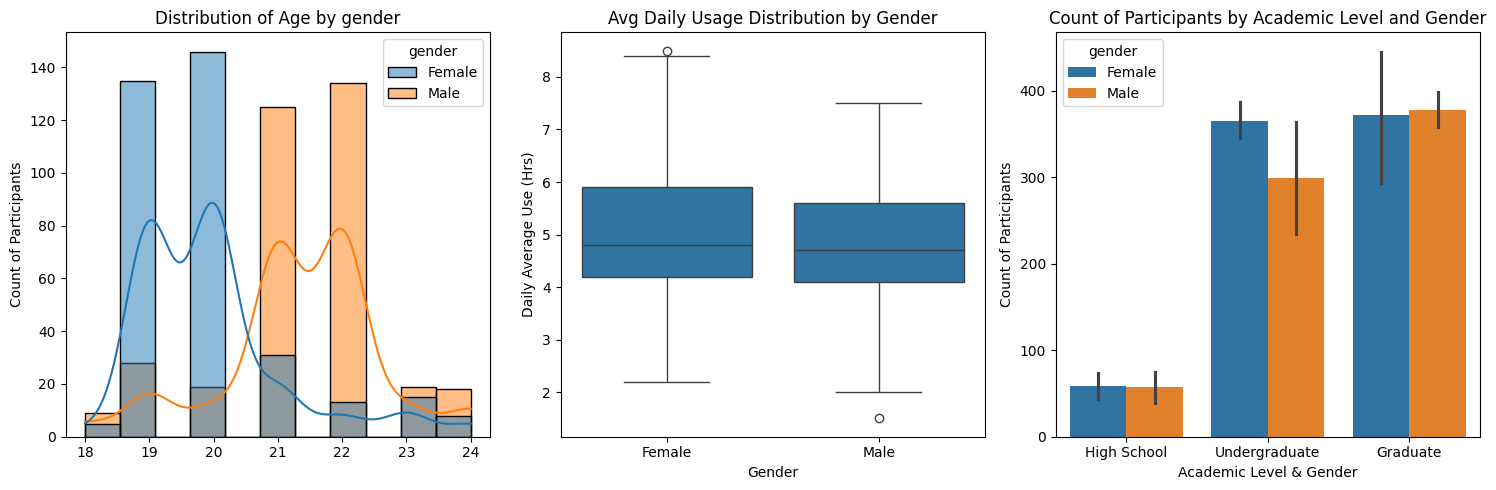

In [265]:
# Subplots
plt.figure(figsize=(15,5))

# Order aca categories
acad_order = ["High School", "Undergraduate", "Graduate"]

# Count of participants by aca level
plt.subplot(1,3,1)
sns.histplot(data=df_cleaned, x="age", hue="gender",kde=True)
plt.title("Distribution of Age by gender")
plt.xlabel("")
plt.ylabel("Count of Participants")

# Distribution of addiction score by gender
plt.subplot(1,3,2)
sns.boxplot(data=df_cleaned,x="gender",y="avg_daily_usage_hours")
plt.title("Avg Daily Usage Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Daily Average Use (Hrs)")

# Count of participants by aca level & gender
plt.subplot(1,3,3)
sns.barplot(data=df_cleaned, x="academic_level", y="student_id",order=acad_order,hue="gender")
plt.title("Count of Participants by Academic Level and Gender")
plt.xlabel("Academic Level & Gender")
plt.ylabel("Count of Participants")

plt.tight_layout()
plt.show()

**Interpretation**
* Something that I didn't find before my presentation - the age and distribution of gender is quite skewed where majority of the females are just starting university whereas males are the highschoolers and back end of undergrad and graduate
* I don't have time to explore further however the barplot of the academic level reveals that there is still a pretty even distribution of both genders in each.
* Usage is fairly consistent by gender
* Majority of the respondents sit within the undergraduate and graduate academic levels with a small proportion sitting as highschoolers

**Adverse outcomes of social media usage - the What**



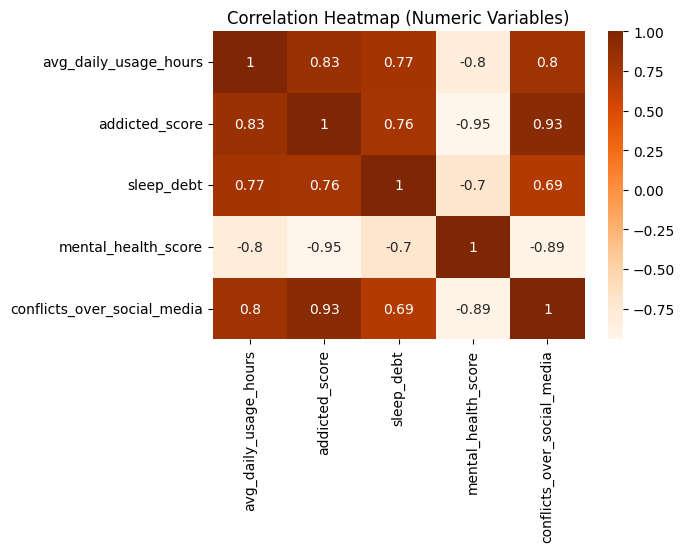

In [266]:
# Numerical metrics to correlate
num = df_cleaned[["avg_daily_usage_hours","addicted_score","sleep_debt","mental_health_score","conflicts_over_social_media"]]

# Correlation Heatmap of adverse outcomes from social media usage
plt.figure(figsize=(6, 4))
sns.heatmap(num.corr(), annot=True, cmap="Oranges")
plt.title("Correlation Heatmap (Numeric Variables)")
plt.show()


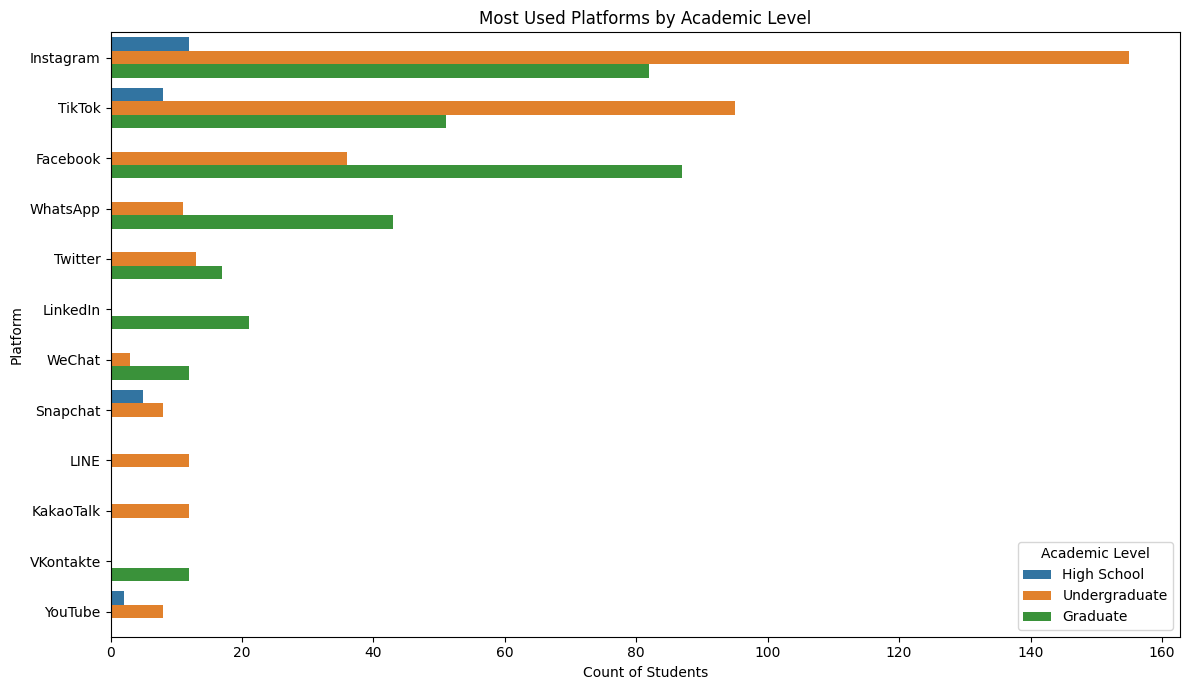

In [267]:
# Platform comparison
# Most used platform by academic level
plt.figure(figsize=(12, 7))
sns.countplot(data=df_cleaned, y="most_used_platform", hue="academic_level",order=df_cleaned["most_used_platform"].value_counts().index,hue_order=acad_order)
plt.title("Most Used Platforms by Academic Level")
plt.xlabel("Count of Students")
plt.ylabel("Platform")
plt.legend(title="Academic Level")
plt.tight_layout()
plt.show()

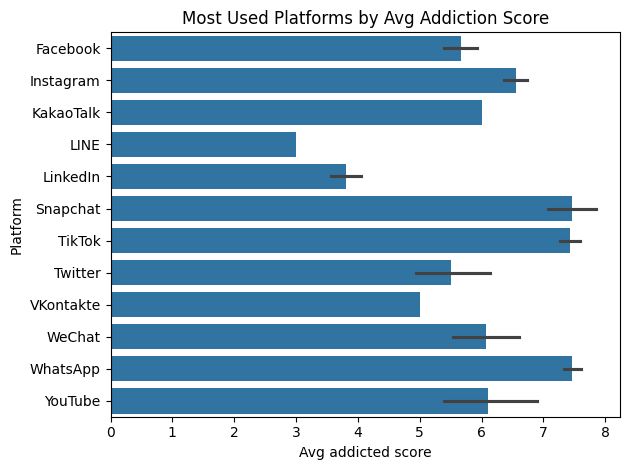

In [268]:
sns.barplot(data=df_cleaned, x="addicted_score", y="most_used_platform")
plt.title("Most Used Platforms by Avg Addiction Score")
plt.xlabel("Avg addicted score")
plt.ylabel("Platform")

plt.tight_layout()
plt.show()

### **Key EDA Insights for Presentation**

**Insight 1: High School Students appear to have the most severe risk profile**

In [269]:

by_academic_level.sort_values("avg_addicted", ascending=False)

,academic_level,n,avg_addicted,avg_sleep_debt,avg_hrs_slept,avg_hrs_used,avg_mental_health_score,pct_academic_impact,avg_conflicts
1,High School,27,8.037,2.544,5.456,5.544,5.111,False,3.741
2,Undergraduate,353,6.493,1.275,6.829,5.001,6.178,False,2.918
0,Graduate,325,6.243,1.039,7.030,4.777,6.372,False,2.702


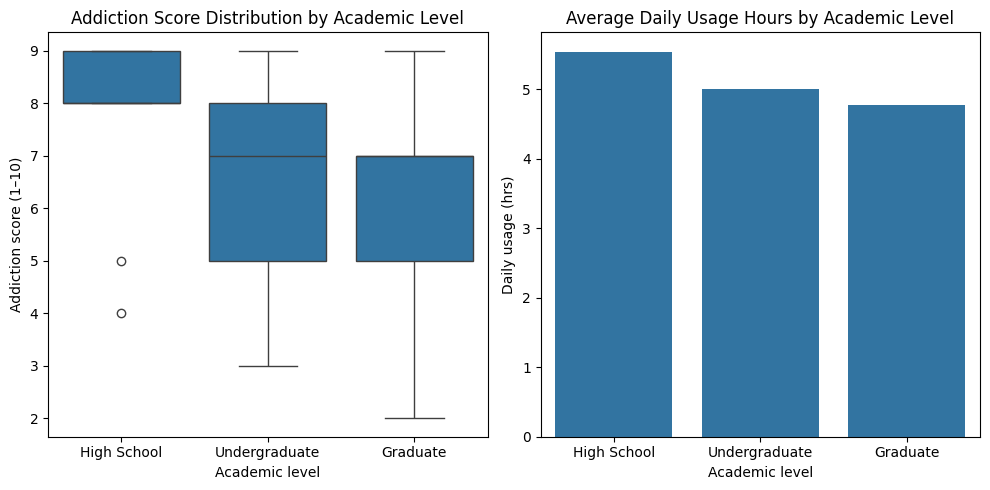

In [270]:
# Figure Size
plt.figure(figsize=(10,5))

# avg addiction score by aca level
plt.subplot(1,2,1)
sns.boxplot(data=df_cleaned, x="academic_level", y="addicted_score", order=acad_order)
plt.title("Addiction Score Distribution by Academic Level")
plt.xlabel("Academic level")
plt.ylabel("Addiction score (1–10)")


# Plot avg daily usage hours by aca level
plt.subplot(1,2,2)
sns.barplot(data=by_academic_level, x="academic_level", y="avg_hrs_used")
plt.title("Average Daily Usage Hours by Academic Level")
plt.xlabel("Academic level")
plt.ylabel("Daily usage (hrs)")

plt.tight_layout()
plt.show()

**Interpretation**
* High school shows a concentrated distribution of high addiction score compared to undergrad which has a wider distribution suggesting more variability in addiction scores. Graduate have the lowest median addiction scores but has both min and max outliers.
* Social media usage tends to decrease as students progress through to higher academic levels.
* High school students appear to be the most addicted and so a higher average daily usage than other academic levels is expected.

**Limitations**
* n = small
* addicted scores are self-reported

**Insight 2: Students in higher usage intensity buckets are the most affected**

In [271]:
by_usage.sort_values("avg_addicted", ascending=False)

,usage_bucket,n,avg_addicted,avg_sleep_debt,avg_hrs_slept,avg_hrs_used,avg_mental_health_score,pct_academic_impact,avg_conflicts
3,Extreme,143,8.238,2.333,5.667,6.760,4.937,False,3.993
2,Heavy,393,6.547,1.212,6.801,4.929,6.181,False,2.873
1,Moderate,167,4.683,0.278,8.046,3.356,7.413,False,1.85
0,Light,2,2.5,0.100,7.900,1.750,8.5,False,0.0


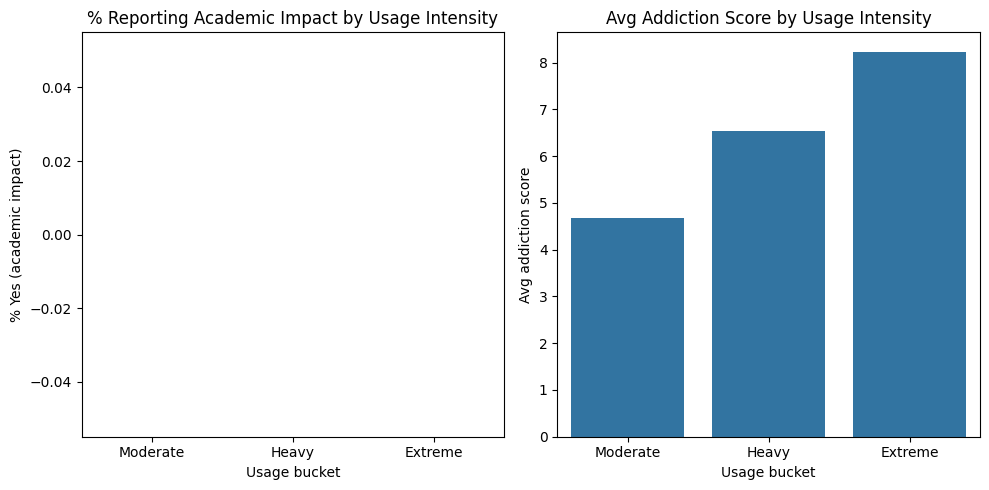

In [272]:
# Figure Size
plt.figure(figsize=(10,5))

# Plot percent aca impact by usage intensity
plt.subplot(1,2,1)
sns.barplot(data=by_usage_plot, x="usage_bucket", y="pct_academic_impact", order=usage_order)
plt.title("% Reporting Academic Impact by Usage Intensity")
plt.xlabel("Usage bucket")
plt.ylabel("% Yes (academic impact)")

# Plot avg addiction score by usage intensity
plt.subplot(1,2,2)
sns.barplot(data=by_usage_plot, x="usage_bucket", y="avg_addicted", order=usage_order)
plt.title("Avg Addiction Score by Usage Intensity")
plt.xlabel("Usage bucket")
plt.ylabel("Avg addiction score")

plt.tight_layout()
plt.show()


**Interpretation**
* Clear upward trend - as usage intensity increases, % reporting academic impact rises sharply
* This suggests that higher social media usage is directly correlated with a greater perceived negative impact on academic performance
* The second graph indicates that the more time students spend on social media, the more likely they are to perceive themselves as addicted.

**Brick**
* This supports targeting higher-intensity users because Brick is designed to interrupt habitual usage.

**Limitations**
* scores are self-reported

**Insight 3: 92% of high schoolers report an impact on academic performance**

In [273]:
by_academic_level.sort_values("pct_academic_impact", ascending=False)

,academic_level,n,avg_addicted,avg_sleep_debt,avg_hrs_slept,avg_hrs_used,avg_mental_health_score,pct_academic_impact,avg_conflicts
1,High School,27,8.037,2.544,5.456,5.544,5.111,False,3.741
2,Undergraduate,353,6.493,1.275,6.829,5.001,6.178,False,2.918
0,Graduate,325,6.243,1.039,7.030,4.777,6.372,False,2.702


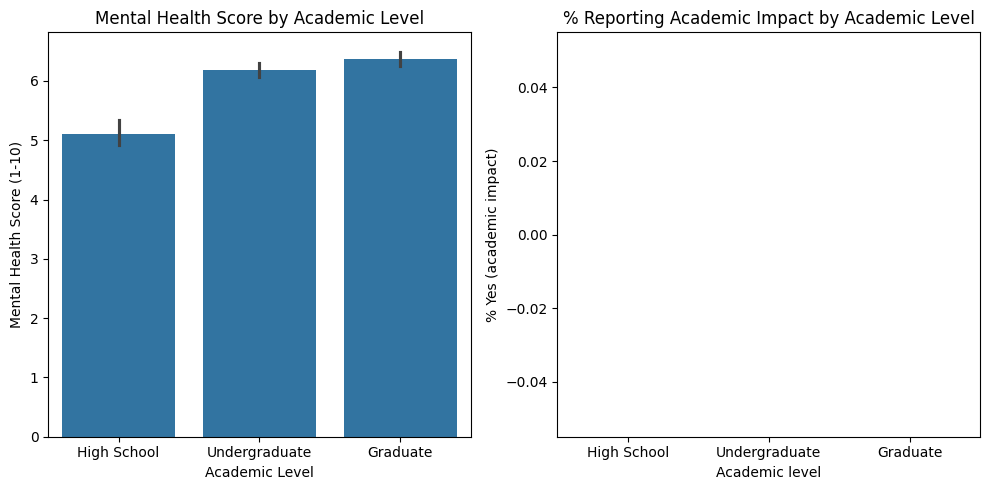

In [274]:
# Subplots
plt.figure(figsize=(10,5))

# Plot count of participants by aca level
plt.subplot(1,2,1)
sns.barplot(data=df_cleaned, x="academic_level", y="mental_health_score",order=acad_order)
plt.title("Mental Health Score by Academic Level")
plt.xlabel("Academic Level")
plt.ylabel("Mental Health Score (1-10)")

# % academic impact by aca level)
plt.subplot(1,2,2)
sns.barplot(data=by_academic_level, x="academic_level", y="pct_academic_impact", order=acad_order)
plt.title("% Reporting Academic Impact by Academic Level")
plt.xlabel("Academic level")
plt.ylabel("% Yes (academic impact)")


plt.tight_layout()
plt.show()

**Interpretation**
* Presents an inverse relationship between academic level (as well as potentially age and maturity) and reported mental health with younger demographics experiencing lower mental health scores. Could be due pressures of social media or other factors unique to this age group - future work.
* Very high percent ~92% report that social media affects their academic performance. Supports notion that academic performance is a concern for younger students and the impacts of social media are more pronounced in the earlier stages of thier education

**Limitations**
* n= small for high school
* scores are self-reported

**Insight 4: High schoolers appear to concentrate on high addiction platforms**

In [275]:
by_platform.sort_values("avg_addicted", ascending=False).head()

,most_used_platform,n,avg_addicted,avg_usage
10,WhatsApp,54,7.463,6.476
5,Snapchat,13,7.462,5.092
6,TikTok,154,7.429,5.346
1,Instagram,249,6.554,4.872
11,YouTube,10,6.1,4.080


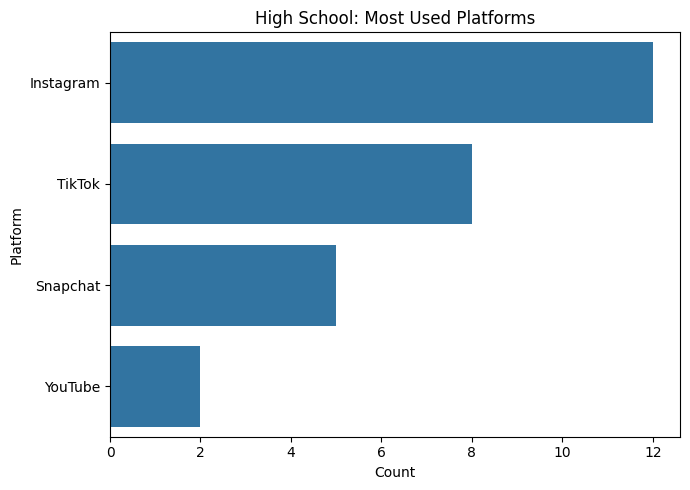

In [276]:
# Create df where aca level is just highschool
hs = df_cleaned[df_cleaned["academic_level"] == "High School"].copy()

plt.figure(figsize=(7,5))
sns.countplot(data=hs, y="most_used_platform",order=hs["most_used_platform"].value_counts().index)
plt.title("High School: Most Used Platforms")
plt.xlabel("Count")
plt.ylabel("Platform")
plt.tight_layout()
plt.show()


**Interpretation**
* These 4 platforms sit in the top 5 for highest avg addiction score. If high school students are heavily using platforms indicated as higher addiction potential, it may further explan why this group has high addiction scores.

**Brick**
*

**Limitations**
* n= small for high school
* scores are self-reported

### **Identified patterns, anomalies, and early hypotheses**

**Early Hypotheses:**
* Younger students, particularly high schoolers, are hypothesized to be more susceptible to social media addiction and its associated negative impacts on mental health and academic performance, possibly due to developmental factors, peer pressure, and platform choice.
* I expect platforms such as Tik-Tok and Instagram to report high usage and addiction scores due to the rapid growth of short-form video consumption in the last 5 or so years. These platforms compete in the "attention economy discussed in my report and inherently possess features that contribute significantly to addictive behaviors. If not those, snapchat as a popular messaging app.
* Having experienced it all myself, I expect to see strong correlation between usage intensity and adverse outcomes.

**Patterns and Relationships:**
* High school students displayed the most severe risk profile across multiple adverse outcomes; highest average addiction score, highest average daily usage hours, lowest mental health scores, and the highest percentage reporting academic impact. Social media usage and addiction tend to decrease as students progress through higher academic levels.
* Platforms like WhatsApp, Snapchat, and TikTok show the highest average addiction scores with Instagram and Tiktok having the most users. High school students appear to concentrate their usage on these "high-addiction" platforms.
* There is a strong and consistent upward trend in adverse outcomes (addiction score, sleep debt, academic impact, conflicts) as social media usage intensity increases. Conversely, mental health scores decline with increased usage. This reinforces my hypothesis that higher usage is  correlated with a greater negative impact.

**Anomalies:**
* An observed anomaly is that the age and gender distribution is somewhat skewed, with a majority of females appearing to be starting university, while males are more prevalent in the high school and later undergraduate/graduate stages. However, further analysis showed a relatively even distribution of both genders within each academic level.
* The sample size for high school students (n=27) is considerably smaller than for undergraduate and graduate students, which limits the generalizability of findings for this demographic.
* WhatsApp being the most addictive app was very surprising - would have thought it would've been Instagram, Tiktok or Snapchat.

**Summary:**
* These insights suggest that targeting Brick as an intervention towards high-intensity users and younger academic demographics (High School and early Undergraduate) could result in the most significant positive impact.


### Insights or Next Steps

* Targeted campaigns aimed at reducing habitual usage, especially for high-intensity users and younger academic demographics (High School and early Undergraduate), are likely to be most effective given the strong correlations identified.
* Investigation into a metric such as "needs intervention" and then running a logistic regression model to predict whether new respondents are at risk and need intervention. Further research and a richer dataset may be required to have a stronger indicator for "needs intervention".

### **Export CSV's**

In [283]:
print(df_country_summary.columns)
print(df_cleaned.columns)



Index(['n_students', 'avg_addicted', 'avg_usage', 'avg_sleep_debt',
       'pct_academic_impact', 'avg_conflicts', 'gdp_latest', 'pop_latest'],
      dtype='object')
Index(['student_id', 'age', 'gender', 'academic_level',
       'avg_daily_usage_hours', 'most_used_platform',
       'affects_academic_performance', 'sleep_hours_per_night',
       'mental_health_score', 'relationship_status',
       'conflicts_over_social_media', 'addicted_score', 'country_name',
       'country_name_std', 'country_code', 'gdp_2024', 'pop_2024', 'gdp_2023',
       'pop_2023', 'gdp_latest', 'pop_latest', 'sleep_debt', 'usage_bucket',
       'yoy_gdp_pct', 'yoy_pop_pct'],
      dtype='object')


In [284]:
df_cleaned

,student_id,age,gender,academic_level,avg_daily_usage_hours,most_used_platform,affects_academic_performance,sleep_hours_per_night,mental_health_score,relationship_status,...,gdp_2024,pop_2024,gdp_2023,pop_2023,gdp_latest,pop_latest,sleep_debt,usage_bucket,yoy_gdp_pct,yoy_pop_pct
0,231,20,Female,Undergraduate,4.7,Facebook,False,7.4,7,In Relationship,...,64407.484257,27204809,64835.919975,26652777,64407.484257,27204809,0.6,Heavy,-0.660800,2.071199
1,247,20,Female,Undergraduate,4.8,Facebook,False,7.2,7,In Relationship,...,64407.484257,27204809,64835.919975,26652777,64407.484257,27204809,0.8,Heavy,-0.660800,2.071199
2,263,20,Female,Undergraduate,4.3,Facebook,False,7.5,7,In Relationship,...,64407.484257,27204809,64835.919975,26652777,64407.484257,27204809,0.5,Heavy,-0.660800,2.071199
3,279,20,Female,Undergraduate,4.4,Facebook,False,7.4,7,In Relationship,...,64407.484257,27204809,64835.919975,26652777,64407.484257,27204809,0.6,Heavy,-0.660800,2.071199
4,295,20,Female,Undergraduate,4.2,Facebook,False,7.6,7,In Relationship,...,64407.484257,27204809,64835.919975,26652777,64407.484257,27204809,0.4,Heavy,-0.660800,2.071199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,67,20,Male,Undergraduate,3.9,YouTube,False,6.5,7,Complicated,...,13523.724683,6587202,12281.505849,6623183,13523.724683,6587202,1.5,Moderate,10.114548,-0.543258
701,79,20,Male,Undergraduate,4.7,YouTube,True,5.9,6,Single,...,1341.202290,10590927,1178.479901,10389799,1341.202290,10590927,2.1,Heavy,13.807821,1.935822
702,4,18,Male,High School,3.0,YouTube,False,7.0,7,Single,...,52636.786594,69226000,49200.810153,68492000,52636.786594,69226000,1.0,Moderate,6.983577,1.071658
703,51,21,Male,Undergraduate,3.8,YouTube,False,6.4,7,Single,...,23906.513303,3386588,23019.422156,3388081,23906.513303,3386588,1.6,Moderate,3.853664,-0.044066


In [278]:
# Export dataframes for BI
df_cleaned.to_csv('Enriched_Students_Social_Media_Addiction.csv', index=False)
df_country_summary.to_csv("Country_Level_Summary.csv", index=False)

### Old charts - Void

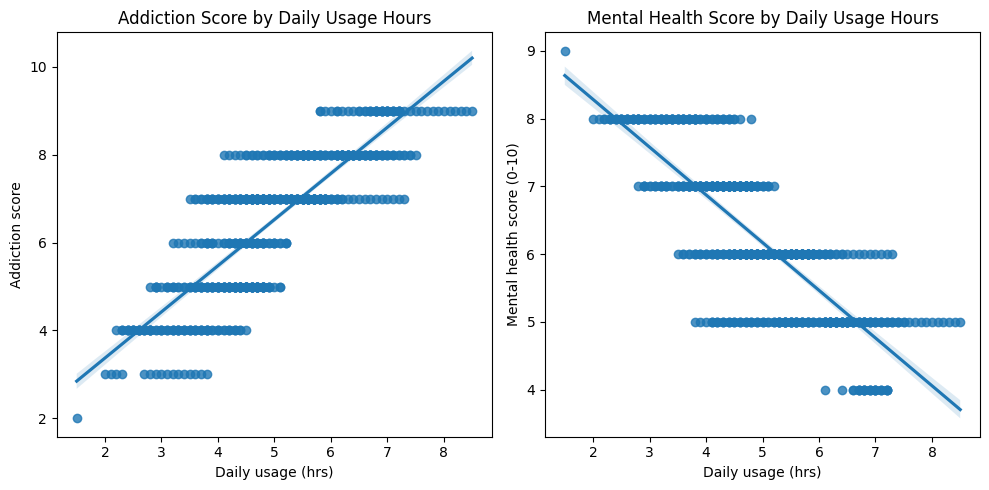


The correlation of Addiction is: 0.832 indicating a strong positive correlation

The correlation of Sleep Debt is: -0.801 indicating a strong positive correlation


In [279]:
# Calculate correlation
corr_du_add = df_cleaned['avg_daily_usage_hours'].corr(df_cleaned['addicted_score'])
corr_du_mhs = df_cleaned['avg_daily_usage_hours'].corr(df_cleaned['mental_health_score'])

# Correlations
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.regplot(data=df_cleaned, x="avg_daily_usage_hours", y="addicted_score", ci=95)
plt.title("Addiction Score by Daily Usage Hours")
plt.xlabel("Daily usage (hrs)")
plt.ylabel("Addiction score")

plt.subplot(1,2,2)
sns.regplot(data=df_cleaned, x="avg_daily_usage_hours", y="mental_health_score", ci=95)
plt.title("Mental Health Score by Daily Usage Hours")
plt.xlabel("Daily usage (hrs)")
plt.ylabel("Mental health score (0-10)")

plt.tight_layout()
plt.show()

print(f"\nThe correlation of Addiction is: {round(corr_du_add,3)} indicating a strong positive correlation\n")
print(f"The correlation of Sleep Debt is: {round(corr_du_mhs,3)} indicating a strong positive correlation")

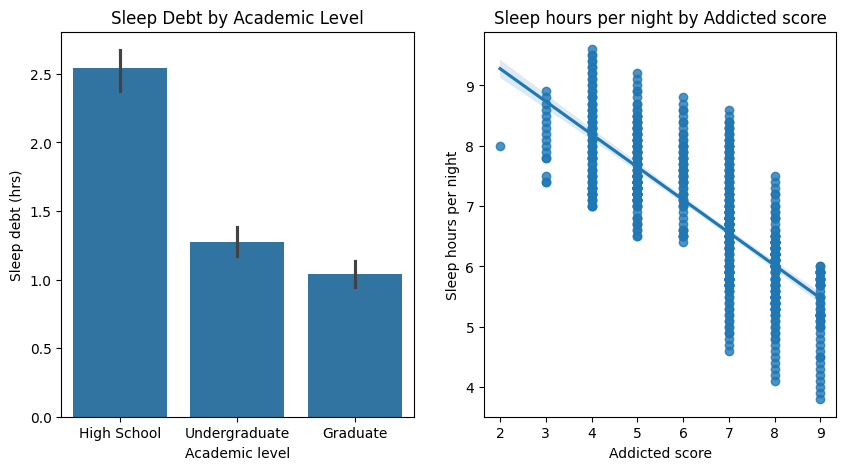


Note: Assuming 8 hours is the recommended amount of sleep (recommended between 7-9 -> avg = 8) - sleep debt takes 8 minus the students sleep score


In [280]:
# Plot avg daily usage hours by aca level
plt.figure(figsize=(10,5))

# Sleep debt
plt.subplot(1,2,1)
sns.barplot(data=df_cleaned, x="academic_level", y="sleep_debt", order=acad_order)
plt.title("Sleep Debt by Academic Level")
plt.xlabel("Academic level")
plt.ylabel("Sleep debt (hrs)")

# Addiction and sleep
plt.subplot(1,2,2)
sns.regplot(data=df_cleaned, x="addicted_score", y="sleep_hours_per_night", ci=95)
plt.title("Sleep hours per night by Addicted score")
plt.xlabel("Addicted score")
plt.ylabel("Sleep hours per night")

plt.show()
print(f"\nNote: Assuming 8 hours is the recommended amount of sleep (recommended between 7-9 -> avg = 8) - sleep debt takes 8 minus the students sleep score")

In [281]:
# Is academic performance related to lack of sleep?
academic_sleep_debt = df_cleaned.groupby("affects_academic_performance").agg(
    sum_sleep_debt=("sleep_debt","sum"))
academic_sleep_debt

,sum_sleep_debt
affects_academic_performance,
False,99.2
True,757.4


# END